### Computational explorations of examples arising in modern number theory
##### [Hiroyuki Chihara](https://fiomfd.github.io/) (University of the Ryukyus, Okinawa Island, Japan)
##### [ATCM](https://atcm.mathandtech.org/) 2025, 13-16 December 2025, [Ateneo de Manila University](https://www.ateneo.edu/)

In [3]:
pip install pandas

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pprint
#import pandas as pd
from numpy.linalg import *
from sympy import primerange
from sympy import isprime
from sympy import gcd
from sympy import factorint
from math import log

### The Prime Number Theorem

In his work Elements, Euclid first proved that there exist infinitely many prime numbers in c.300 BC. 

For $x>1$, the number of primes less than or equal to $x$ is denoted by $\pi(x)$. Euclid's theorem implies that $\pi(x) \rightarrow \infty$ ($x \rightarrow \infty$).

The Prime Number Theorem provides the behavior of $\pi(x)$ as $x\rightarrow \infty$ and the information of the distribution of primes:

$\pi(x) \bigg/ \dfrac{x}{\log{x}} 
\rightarrow 1
\quad
(x \rightarrow \infty).$

In 1896, the Prime Number Theorem was proved by Jacques Hadamard and Charles Jean de la Vallée-Poussin independently.

The following graphs visualize 
- The difference $\pi(x) - \dfrac{x}{\log{x}} \rightarrow \infty$ as $x \rightarrow \infty$.

- The convergence of $\pi(x) \bigg/ \dfrac{x}{\log{x}}$ is very slow. 

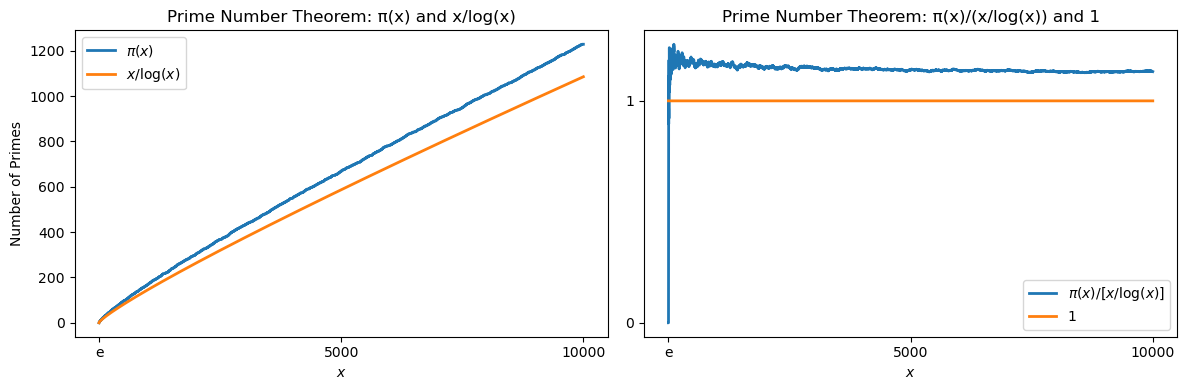

In [2]:
# Initialization
P1 = np.zeros(10000)
L1 = np.zeros(10000)
N1 = np.zeros(10000)
Q1 = np.ones(10000)
R1 = np.zeros(10000)

# Substitute the first two terms (Python starts at 0)
P1[1] = 1
P1[2] = 1
L1[1] = 3 / log(3)
L1[2] = 3 / log(3)
N1[1] = 1
N1[2] = 2

# Main Loop
for i in range(3, 10000):
    A1 = np.array([float(isprime(j)) for j in range(1, i + 1)])
    P1[i] = np.sum(A1)
    L1[i] = i / log(i)
    N1[i] = i
    R1[i] = P1[i] /L1[i]
    
# ====================
# Create a diagram
# ====================

# Two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Figure 1 ---
ax1.plot(N1, P1, label=r"$\pi(x)$", linewidth=2)
ax1.plot(N1, L1, label=r"$x/\log(x)$", linewidth=2)

ax1.set_title("Prime Number Theorem: π(x) and x/log(x)")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel("Number of Primes")
ax1.set_xticks([1, 5000, 10000])
ax1.set_xticklabels(["e", "5000", "10000"])
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(False)

# --- Figure 2 ---
ax2.plot(N1, R1, label=r"$\pi(x)/[x/\log(x)]$", linewidth=2)
ax2.plot(N1, Q1, label="1", linewidth=2)

ax2.set_title("Prime Number Theorem: π(x)/(x/log(x)) and 1")
ax2.set_xlabel(r"$x$")
ax2.set_xticks([1, 5000, 10000])
ax2.set_xticklabels(["e", "5000", "10000"])
ax2.set_yticks([0, 1])
ax2.grid(False)
ax2.legend(loc='lower right', fontsize=10)

# Margin adjustment (simple with tight_layout)
plt.tight_layout()
plt.show()

### The Green-Tao Theorem

In 2004 Ben Green and Terence Tao proved the following historical theorem in number theory: 

###### *The prime numbers contain infinitely many arithmetic progressions of length $k$ for all $k$.*
######
The original paper is [here](https://doi.org/10.4007/annals.2008.167.481).

We explore such arithmetic progressions $\{x_n\}_{n=1}^k$ using Julia.  
Note that 
- If $x_1=2$, then $k\leqq2$. 
- If $x_1\ne2$, then the common difference of successive members is even. 
- If the final digit of $x_1$ is $5$, then $k\leqq5$.

So we investigate such arithmetic progressions of the form:

$x_n=(a+10b)+2c\times(n-1), \quad n=1,2,3,\dotsc,k,$

where $x_1=a+10b$ is the first term, $2c$ is the common difference, $a=1,3,7,9$, and $b,c=1,2,3,\dotsc.$

In [3]:
# set length k < width+1
k=7;

# The set of final digits
a = np.array([1, 3, 7, 9]);

# Add [1, 2, ..., k] to the first row of X
X = [list(range(1, k + 1))]

# Exploring prime number sequences
for i in range(4):  # i = 0 to 3
    for b in range(0, 4001):
        for c in range(1, 2001):
            P = []
            for n in range(1, k + 1):
                value = a[i] + 10 * b + 2 * c * (n - 1)
                P.append(value)
            if all(isprime(p) for p in P):
                X.append(P);

# width=10 
X=pprint.pprint(X[1:], width=10);
np.array(X)

# DataFrame 
#df = pd.DataFrame(X) 

[[71,
  2381,
  4691,
  7001,
  9311,
  11621,
  13931],
 [631,
  3361,
  6091,
  8821,
  11551,
  14281,
  17011],
 [811,
  3541,
  6271,
  9001,
  11731,
  14461,
  17191],
 [881,
  1091,
  1301,
  1511,
  1721,
  1931,
  2141],
 [1061,
  1901,
  2741,
  3581,
  4421,
  5261,
  6101],
 [1091,
  1301,
  1511,
  1721,
  1931,
  2141,
  2351],
 [1091,
  3821,
  6551,
  9281,
  12011,
  14741,
  17471],
 [1181,
  3701,
  6221,
  8741,
  11261,
  13781,
  16301],
 [1301,
  5081,
  8861,
  12641,
  16421,
  20201,
  23981],
 [1811,
  3701,
  5591,
  7481,
  9371,
  11261,
  13151],
 [1931,
  3191,
  4451,
  5711,
  6971,
  8231,
  9491],
 [2411,
  5981,
  9551,
  13121,
  16691,
  20261,
  23831],
 [2801,
  4271,
  5741,
  7211,
  8681,
  10151,
  11621],
 [3821,
  6551,
  9281,
  12011,
  14741,
  17471,
  20201],
 [4721,
  7451,
  10181,
  12911,
  15641,
  18371,
  21101],
 [5651,
  6491,
  7331,
  8171,
  9011,
  9851,
  10691],
 [6571,
  9931,
  13291,
  16651,
  20011,
  23371,
  267

array(None, dtype=object)

### The abc conjecture

This is a conjecture emerged during the discussion of Joseph Oesterlé and David Masser in 1985. To state this we introcude abc triplet and the radical. Denote by $\mathbb{N}$ the set of all positive integers. 

The set of abc triplets is defined by 

$X:=
\{
(a,b,c)\in\mathbb{N} : a<b<c, a+b=c, 
\operatorname{gcd}(a,b)=\operatorname{gcd}(b,c)=\operatorname{gcd}(c,a)=1
\}$

If the prime factorization of $N$ is given by 

$N=p_1^{m(1)} \dotsb p_k^{m(k)},
\quad
p_1<\dotsb<p_k,
\quad
m(1),\dotsc,m(k)\in\mathbb{N},$

then the radical of $N$ is defined by 

$\operatorname{rad}(N):=p_1 \dotsb p_k
.$

For example

$\operatorname{rad}(2145825)
=\operatorname{rad}(3^3\cdot5^2\cdot11\cdot17^2)
=3\cdot5\cdot11\cdot17
=2805.$

For $\kappa\geqq1$, set

$X[\kappa]
:=
\{(a,b,c) \in X : c \geqq \bigl(\operatorname{rad}(abc\bigr)^\kappa
\}.$

###### The abc conjecture states that $\lvert{X[\kappa]}\rvert<\infty$ for any $\kappa>1$.
######

Shinichi Mochizuki claimed to have a proof in 2012, and the four papers were published in 2020. 

We now remark some properties of $X[\kappa]$:

- If $\kappa<\mu$, then $X[\mu] \subset X[\kappa]$.

- We have $(1,8,9),(5,27,32){\in}X[1]$ since 

$\operatorname{rad}(1\cdot8\cdot9)
=
\operatorname{rad}(1\cdot2^3\cdot3^2)
=
2\cdot3=6<9,$

$\operatorname{rad}(5\cdot27\cdot32)
=
\operatorname{rad}(5\cdot3^3\cdot2^5)
=
5\cdot3\cdot2=30<32.$

- We have $\{(1,3^{2^k}-1,3^{2^k})\}_{k=1}^\infty \subset X[1]$ and $\lvert{X[1]}\rvert=\infty$. Indeed we deduce that 

$b
=
(3^{2^{k-1}}+1)(3^{2^{k-1}}-1)
=
\dotsb
=
\prod_{l=1}^{k-1}
(3^{2^l}+1)
\times
(3+1)
(3-1).$

and $b=3^{2^k}-1$ is a multiple of $2^{k+2}$ since $3+1=4=2^2$. The we have 

$\operatorname{rad}\bigl(1\cdot(3^{2^k}-1)\cdot3^{2^k}\bigr)
=
\operatorname{rad}\left(1\cdot\frac{3^{2^k}-1}{2^{k+1}}\cdot3\right)
\leqq
\frac{3(3^{2^k}-1)}{2^{k+1}}
\leqq
\frac{3(3^{2^k}-1)}{4}
<
3^{2^k}
=c.$

- The confirmed elements of $X[1.6]$ are 

$(2, 3^{10}\cdot109, 23^5),
\quad
(11^2, 3^2\cdot5^6\cdot7^3, 2^{21}\cdot23), 
\quad
(19\cdot1307, 7\cdot29^2\cdot31^8, 2^8\cdot3^{22}\cdot5^4).$

- There is no confirmed element of $X[2]$. 

In [5]:
# Set kappa
κ=1.3;

# Set a dammy first row
Q=[[1,2,3]];

for a in range(1, 501):  # 1-500
    for b in range(a + 1, a + 2501):  # b > a
        c = a + b
        abc = a * b * c

        # Factorize a number and 
        # obtain a set of prime factors (without duplicates)
        factor_dict = factorint(abc)
        # List of prime factors in ascending order
        factors = sorted(factor_dict.keys())  
        rad = 1
        for p in factors:
            rad *= p

        # Check coprimes
        if gcd(a, b) == 1 and gcd(a, c) == 1 and gcd(b, c) == 1:
            if c >= rad ** κ:
                Q.append([a, b, c])
                
np.array(Q[1:])

array([[   1,  242,  243],
       [   1,  512,  513],
       [   1, 2400, 2401],
       [   3,  125,  128]])